In [69]:
import pandas as pd

weather = pd.read_csv("/content/weather.csv", index_col="DATE")

In [70]:
weather.head()

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [71]:
weather.apply(pd.isnull).sum()/weather.shape[0]


STATION    0.000000
NAME       0.000000
ACMH       0.667217
ACSH       0.667217
AWND       0.501509
DAPR       0.999544
FMTM       0.875292
FRGT       0.999886
MDPR       0.999544
PGTM       0.515233
PRCP       0.016172
SNOW       0.351973
SNWD       0.344912
TAVG       0.884004
TMAX       0.000626
TMIN       0.000797
TSUN       0.934457
WDF1       0.667217
WDF2       0.501452
WDF5       0.506463
WDFG       0.757018
WSF1       0.667217
WSF2       0.501395
WSF5       0.506463
WSFG       0.757018
WT01       0.777518
WT02       0.980126
WT03       0.992597
WT04       0.999772
WT05       0.998349
WT07       0.999886
WT08       0.815216
WT09       0.999886
WT16       0.888674
WT18       0.999829
dtype: float64

In [72]:
core_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()
core_weather.columns = ["precip", "snow", "snow_depth", "temp_max", "temp_min"]

In [73]:
core_weather.apply(pd.isnull).sum()

precip         284
snow          6181
snow_depth    6057
temp_max        11
temp_min        14
dtype: int64

In [74]:
core_weather["snow"].value_counts()

snow
0.0    11379
1.0        1
Name: count, dtype: int64

In [75]:
core_weather["snow_depth"].value_counts()

snow_depth
0.0    11504
Name: count, dtype: int64

In [76]:
del core_weather["snow"]

In [77]:
del core_weather["snow_depth"]

In [78]:
core_weather[pd.isnull(core_weather["precip"])]

,precip,temp_max,temp_min
DATE,,,
1983-10-29,NaN,67.0,57.0
1983-10-30,NaN,70.0,63.0
1983-10-31,NaN,69.0,61.0
1983-11-12,NaN,63.0,55.0
1983-11-13,NaN,60.0,50.0
...,...,...,...
2016-05-08,NaN,67.0,56.0
2017-10-28,NaN,68.0,50.0
2023-03-29,NaN,52.0,43.0


In [79]:
core_weather.loc["2013-12-15",:]

precip       NaN
temp_max    58.0
temp_min    33.0
Name: 2013-12-15, dtype: float64

In [80]:
core_weather["precip"].value_counts() / core_weather.shape[0]

precip
0.00    0.812368
0.01    0.025283
0.02    0.011560
0.03    0.007118
0.04    0.005979
          ...   
1.05    0.000057
1.38    0.000057
1.95    0.000057
2.01    0.000057
1.28    0.000057
Name: count, Length: 179, dtype: float64

In [81]:
core_weather["precip"] = core_weather["precip"].fillna(0)

In [82]:
core_weather.apply(pd.isnull).sum()

precip       0
temp_max    11
temp_min    14
dtype: int64

In [83]:
core_weather[pd.isnull(core_weather["temp_min"])]

,precip,temp_max,temp_min
DATE,,,
2004-11-20,0.0,NaN,NaN
2011-12-21,0.0,61.0,NaN
2011-12-22,0.0,62.0,NaN
2011-12-23,0.0,56.0,NaN
2011-12-24,0.0,55.0,NaN
2011-12-25,0.0,54.0,NaN
2013-06-16,0.0,NaN,NaN
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN


In [84]:
core_weather.loc["2011-12-18":"2011-12-28"]

,precip,temp_max,temp_min
DATE,,,
2011-12-18,0.0,52.0,33.0
2011-12-19,0.0,55.0,35.0
2011-12-20,0.0,61.0,35.0
2011-12-21,0.0,61.0,NaN
2011-12-22,0.0,62.0,NaN
2011-12-23,0.0,56.0,NaN
2011-12-24,0.0,55.0,NaN
2011-12-25,0.0,54.0,NaN
2011-12-26,0.0,50.0,32.0


In [85]:
core_weather = core_weather.fillna(method="ffill")

In [86]:
core_weather.apply(pd.isnull).sum()

precip      0
temp_max    0
temp_min    0
dtype: int64

In [87]:
core_weather.apply(lambda x: (x == 9999).sum())

precip      0
temp_max    0
temp_min    0
dtype: int64

In [88]:
core_weather.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [89]:
core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2023-12-21', '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
       '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29', '2023-12-30'],
      dtype='object', name='DATE', length=17561)

In [90]:
core_weather.index = pd.to_datetime(core_weather.index)

In [91]:
core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2023-12-21', '2023-12-22', '2023-12-23', '2023-12-24',
               '2023-12-25', '2023-12-26', '2023-12-27', '2023-12-28',
               '2023-12-29', '2023-12-30'],
              dtype='datetime64[ns]', name='DATE', length=17561, freq=None)

In [92]:
core_weather.index.year

Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
       ...
       2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
      dtype='int32', name='DATE', length=17561)

<Axes: xlabel='DATE'>

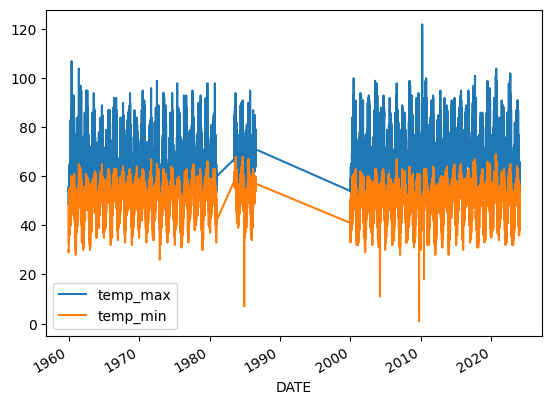

In [93]:
core_weather[["temp_max", "temp_min"]].plot()

In [94]:
core_weather.index.year.value_counts().sort_index()

DATE
1960    366
1961    365
1962    365
1963    365
1964    366
1965    365
1966    365
1967    365
1968    366
1969    365
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1983    184
1984    366
1985    365
1986    212
2000    365
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    364
Name: count, dtype: int64

<Axes: xlabel='DATE'>

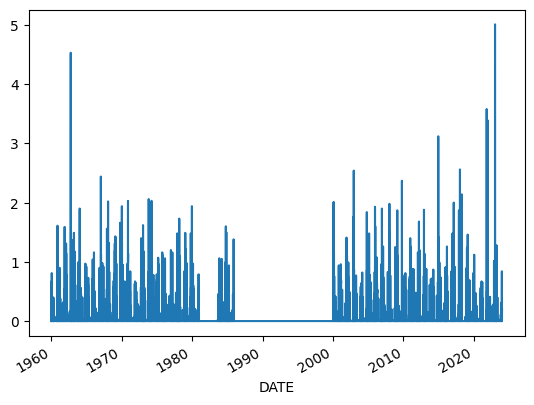

In [95]:
core_weather["precip"].plot()

<Axes: xlabel='DATE'>

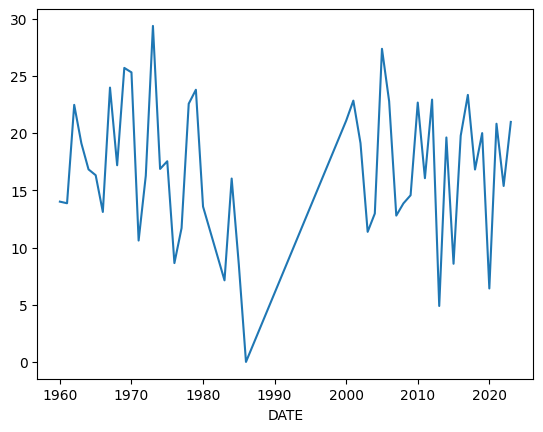

In [96]:
core_weather.groupby(core_weather.index.year).apply(lambda x: x["precip"].sum()).plot()

In [97]:
core_weather["target"] = core_weather.shift(-1)["temp_max"]

In [98]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.00,49.0,30.0,49.0
1960-01-02,0.00,49.0,29.0,54.0
1960-01-03,0.00,54.0,35.0,54.0
1960-01-04,0.00,54.0,36.0,55.0
1960-01-05,0.00,55.0,33.0,53.0
...,...,...,...,...
2023-12-26,0.00,58.0,43.0,59.0
2023-12-27,0.06,59.0,45.0,66.0
2023-12-28,0.00,66.0,54.0,63.0


In [99]:
core_weather = core_weather.iloc[:-1,:].copy()

In [100]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.00,49.0,30.0,49.0
1960-01-02,0.00,49.0,29.0,54.0
1960-01-03,0.00,54.0,35.0,54.0
1960-01-04,0.00,54.0,36.0,55.0
1960-01-05,0.00,55.0,33.0,53.0
...,...,...,...,...
2023-12-25,0.00,57.0,40.0,58.0
2023-12-26,0.00,58.0,43.0,59.0
2023-12-27,0.06,59.0,45.0,66.0


In [101]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [102]:
predictors = ["precip", "temp_max", "temp_min"]

In [144]:
train = core_weather.loc[:"2022-12-31"]
test = core_weather.loc["2023-10-01":]

In [125]:
train

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min
DATE,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609
1960-02-01,0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686
1960-02-02,0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093
1960-02-03,0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319
1960-02-04,0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571
...,...,...,...,...,...,...,...
2000-12-27,0.00,56.0,37.0,59.0,58.066667,1.036905,1.513514
2000-12-28,0.00,59.0,36.0,56.0,58.200000,0.986441,1.638889
2000-12-29,0.00,56.0,33.0,57.0,58.066667,1.036905,1.696970


In [126]:
test

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min
DATE,,,,,,,
2023-10-01,0.00,72.0,52.0,72.0,72.033333,1.000463,1.384615
2023-10-02,0.00,72.0,51.0,74.0,72.033333,1.000463,1.411765
2023-10-03,0.00,74.0,50.0,85.0,72.100000,0.974324,1.480000
2023-10-04,0.00,85.0,56.0,90.0,72.600000,0.854118,1.517857
2023-10-05,0.00,90.0,58.0,91.0,73.100000,0.812222,1.551724
...,...,...,...,...,...,...,...
2023-12-25,0.00,57.0,40.0,58.0,60.400000,1.059649,1.425000
2023-12-26,0.00,58.0,43.0,59.0,60.366667,1.040805,1.348837
2023-12-27,0.06,59.0,45.0,66.0,60.200000,1.020339,1.311111


In [127]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [107]:
predictions = reg.predict(test[predictors])

In [128]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test["target"], predictions)

19.384036535835104

In [129]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [130]:
combined

,actual,predictions
DATE,,
2023-10-01,72.0,70.637112
2023-10-02,74.0,70.459633
2023-10-03,85.0,71.727336
2023-10-04,90.0,80.740712
2023-10-05,91.0,84.708626
...,...,...
2023-12-25,58.0,57.668496
2023-12-26,59.0,58.923525
2023-12-27,66.0,59.876234


<Axes: xlabel='DATE'>

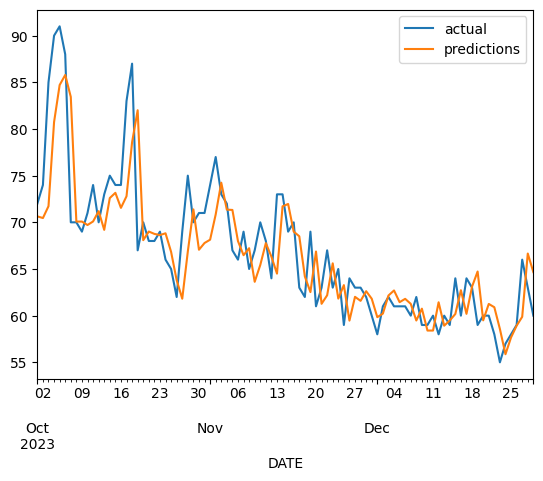

In [131]:
combined.plot()

In [132]:
reg.coef_

array([-1.61619718,  0.78856345,  0.18838648, 11.94126493,  1.29249723])

In [133]:
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()

core_weather["month_day_max"] = core_weather["month_max"] / core_weather["temp_max"]

core_weather["max_min"] = core_weather["temp_max"] / core_weather["temp_min"]

In [134]:
core_weather = core_weather.iloc[30:,:].copy()

In [135]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:"2023-12-31"]
    test = core_weather.loc["2023-10-01":]

    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])

    error = mean_squared_error(test["target"], predictions)

    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [136]:
predictors = ["precip", "temp_max", "temp_min", "month_day_max", "max_min"]

error, combined = create_predictions(predictors, core_weather, reg)
error

17.678259162163855

<Axes: xlabel='DATE'>

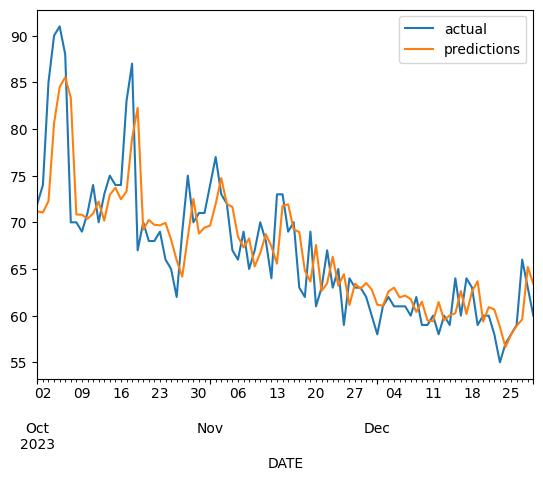

In [137]:
combined.plot()

<Axes: xlabel='DATE'>

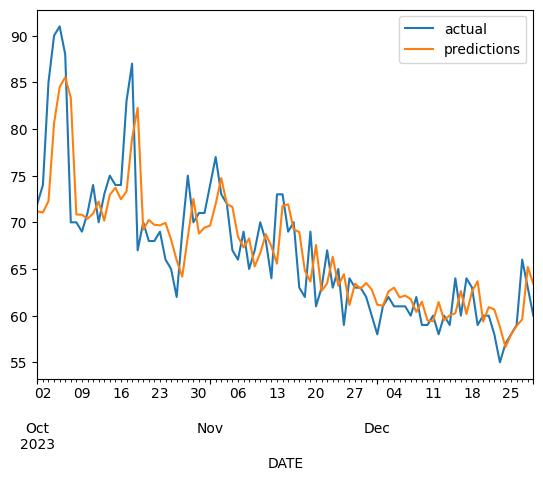

In [138]:
combined.plot()

In [139]:
def create_predictions(predictors, data, reg):
    """
    Create predictions using the linear regression model.

    Parameters:
    predictors (list): List of column names to use as predictors.
    data (pandas.DataFrame): DataFrame containing the predictors and the target column.
    reg (sklearn.linear_model.LinearRegression): Fitted linear regression model.

    Returns:
    predictions (pandas.Series): Predicted values for the target column.
    combined (pandas.DataFrame): DataFrame containing the original data and the predictions.
    """
    # Ensure that the predictors are present in the DataFrame
    if not data.columns.isin(predictors).all():
        missing_predictors = set(predictors) - set(data.columns)
        raise KeyError(f"The following predictors are missing: {missing_predictors}")

    # Prepare the data for prediction
    X = data[predictors]

    # Make predictions
    predictions = reg.predict(X)

    # Create a new DataFrame containing the original data and the predictions
    combined = pd.DataFrame({"predictions": predictions})
    combined = pd.concat([data, combined], axis=1)

    return predictions, combined

In [140]:
reg.coef_


array([-1.68280013,  0.8367866 ,  0.12055269, 13.23136841,  0.14014986])

In [141]:
core_weather.corr()["target"]


precip          -0.204606
temp_max         0.822047
temp_min         0.596133
target           1.000000
month_max        0.688095
month_day_max   -0.421401
max_min          0.044863
Name: target, dtype: float64

In [142]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [143]:
combined.sort_values("diff", ascending=False).head(10)

,actual,predictions,diff
DATE,,,
2023-10-19,67.0,82.262876,15.262876
2023-10-07,70.0,83.354629,13.354629
2023-10-03,85.0,72.273187,12.726813
2023-10-17,83.0,73.308043,9.691957
2023-10-04,90.0,80.615962,9.384038
2023-10-18,87.0,79.014472,7.985528
2023-11-13,73.0,65.567717,7.432283
2023-11-20,61.0,67.570619,6.570619
2023-10-28,75.0,68.433535,6.566465
